In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns 
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)  # Показывать все столбцы
pd.set_option('display.max_rows', 100)     # Показывать все строки



In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [10]:
original_df = pd.read_csv('SteelPlatesFaults.csv')

In [11]:
df_train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [12]:
df_test.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,1257,1271,419960,419973,370,26,28,39293,92,132,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,1358,1372,117715,117724,289,36,32,29386,101,134,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,158,168,232415,232440,80,10,11,8586,107,140,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,559,592,544375,544389,140,19,15,15524,103,134,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [13]:
original_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [15]:
df_train = pd.concat([df_train, original_df], ignore_index=True)
df_train.reset_index(inplace=True, drop=True)

In [16]:
df_train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [17]:
df_train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [18]:
df_train.shape

(21160, 34)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21160 entries, 0 to 21159
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              21160 non-null  int64  
 1   X_Maximum              21160 non-null  int64  
 2   Y_Minimum              21160 non-null  int64  
 3   Y_Maximum              21160 non-null  int64  
 4   Pixels_Areas           21160 non-null  int64  
 5   X_Perimeter            21160 non-null  int64  
 6   Y_Perimeter            21160 non-null  int64  
 7   Sum_of_Luminosity      21160 non-null  int64  
 8   Minimum_of_Luminosity  21160 non-null  int64  
 9   Maximum_of_Luminosity  21160 non-null  int64  
 10  Length_of_Conveyer     21160 non-null  int64  
 11  TypeOfSteel_A300       21160 non-null  int64  
 12  TypeOfSteel_A400       21160 non-null  int64  
 13  Steel_Plate_Thickness  21160 non-null  int64  
 14  Edges_Index            21160 non-null  float64
 15  Em

In [21]:
# check null-values
df_train.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [23]:
duplicate_train = df_train.duplicated().sum()
print(f"Dupliacte values in df_train: {duplicate_train}")
duplicate_test = df_test.duplicated().sum()
print(f"Dupliacte values in df_test: {duplicate_test}")

Dupliacte values in df_train: 0
Dupliacte values in df_test: 0


In [29]:
df_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,21160.000000,21160.000000,2.116000e+04,2.116000e+04,21160.000000,21160.000000,21160.000000,2.116000e+04,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.00000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000,21160.000000
mean,697.130057,741.392202,1.831495e+06,1.828639e+06,1703.240832,97.140737,65.852457,1.931736e+05,84.784594,128.789225,1459.333270,0.402457,0.596645,76.444707,0.350992,0.409758,0.574176,0.030862,0.614362,0.829984,0.590416,2.47521,1.314778,1.390978,0.100958,-0.137733,0.573142,0.076749,0.063327,0.180671,0.030246,0.025520,0.244093,0.341730
std,532.054574,501.160090,1.892922e+06,1.886266e+06,3884.800851,192.510008,161.187566,4.489348e+05,29.121342,14.672936,145.474688,0.490405,0.490583,54.042441,0.317310,0.125408,0.260519,0.048493,0.224385,0.222276,0.482089,0.76322,0.469162,0.410274,0.488925,0.123237,0.332903,0.266198,0.243556,0.384755,0.171267,0.157701,0.429558,0.474301
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.30100,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,214.000000,6.394900e+05,6.395070e+05,88.000000,15.000000,14.000000,9.778000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.059100,0.317500,0.375000,0.006600,0.450000,0.650000,0.000000,1.94450,1.000000,1.079200,-0.272700,-0.192600,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,754.000000,772.000000,1.378585e+06,1.378261e+06,169.000000,25.000000,24.000000,1.840200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.237100,0.413300,0.545400,0.009500,0.636400,0.961500,1.000000,2.22790,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1145.000000,1161.000000,2.339627e+06,2.336466e+06,659.000000,67.000000,62.000000,6.841600e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.648650,0.495200,0.818200,0.019200,0.785700,1.000000,1.000000,2.81890,1.431400,1.716000,0.526300,-0.082800,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.18370,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# в датасете нету пропущенных значении
# также нету дубликатов
# в датасете 21160 записи
# Функции значительно различаются по своим диапазонам, с заметными различиями в среднем и стандартном отклонении между функциями.
# Такие функции, как «Pixels_Areas», «X_Perimeter», «Y_Perimeter» и «Sum_of_Luminosity», имеют относительно большие стандартные отклонения, что указывает на значительную изменчивость их значений.
# Минимальное значение «Minimum_of_Luminosity» равно 0, что указывает на потенциальные выбросы или аномалии.

## Data Viz

In [30]:
# Set seaborn settings
sns.set(rc={"axes.facecolor":"#d7faeb","figure.facecolor":"#d7faeb"})

features = ['X_Minimum', 'X_Maximum', 'Orientation_Index', 'Edges_Index', 'SigmoidOfAreas', 'Square_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Y_Minimum', 'Y_Maximum',
            'Minimum_of_Luminosity', 'Steel_Plate_Thickness', 'Empty_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
            'Luminosity_Index', 'Maximum_of_Luminosity']
labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Числовое распределение признаков

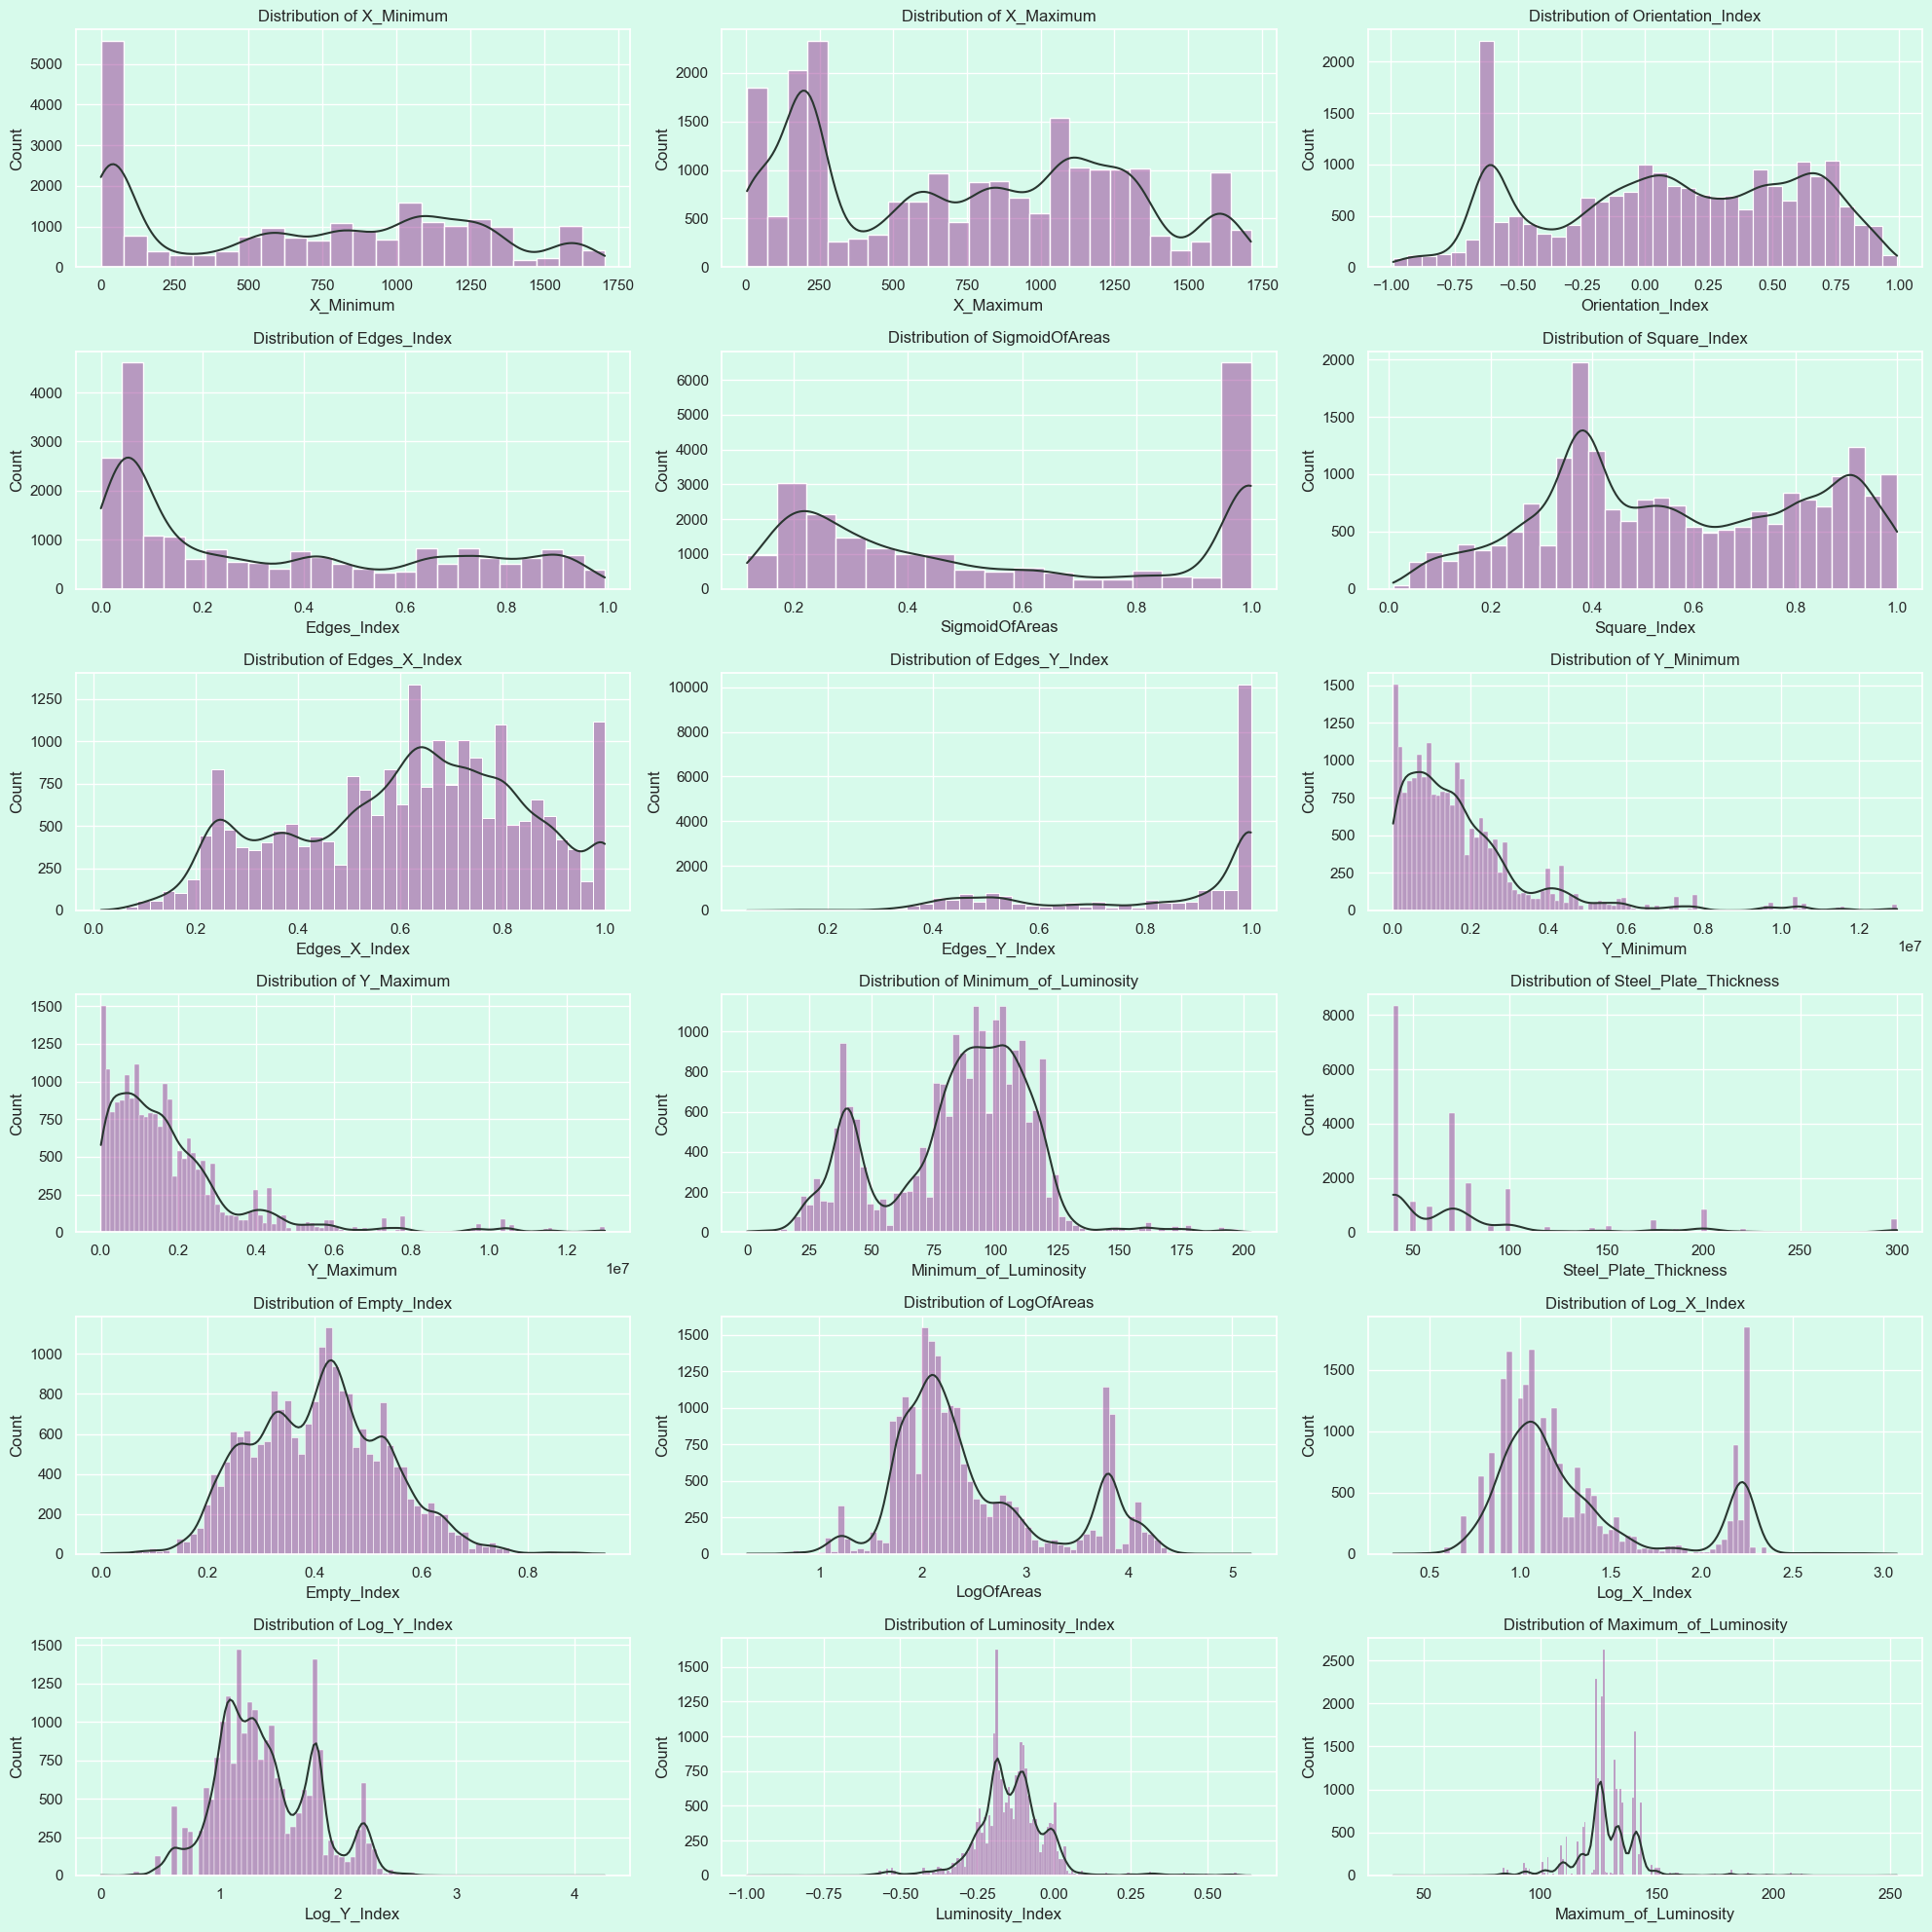

In [33]:
# Set number of rows and columns for subplots
num_rows = 6
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    # Plot histogram for the current feature
    sns.histplot(data=df_train, x=feature, color='#993a97', kde=True, ax=axes[i])
    axes[i].get_lines()[0].set_color('#293630')

    # Set title and labels
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()


## Train Test Split

In [35]:
target_variables = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [36]:
X = df_train.drop(target_variables, axis=1)
y = df_train[target_variables]

# Train Test Split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## CatBoost

In [39]:
catboost_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "iterations": 600,  
    "learning_rate": 0.05,  
    "l2_leaf_reg": 3,  
    "bagging_temperature": 0.5,  
    "random_strength": 0.1,  
    "border_count": 128,  
    "thread_count": 4,  
    "verbose": False,  
    "random_state": 42  
}

In [40]:
df_submission = pd.read_csv("sample_submission.csv")

In [41]:
df_submission[target_variables] = 0

In [42]:
catboost_model = CatBoostClassifier(**catboost_params)
auc_scores = []

for target in target_variables:
    catboost_model.fit(X_train, y_train[target])

    # Predict probabilities
    y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

    # Calculate AUC score
    auc_score = roc_auc_score(y_test[target], y_pred_proba)
    auc_scores.append(auc_score)

     # Add predictions to submission DataFrame
    df_submission[target] += catboost_model.predict_proba(df_test)[:, 1]

# Calculate mean AUC score
mean_auc_score = np.mean(auc_scores)

# Print mean AUC score
print("Mean AUC Score:", mean_auc_score)


Mean AUC Score: 0.8914336186366698


In [43]:
# Save submission file
df_submission.to_csv('submission.csv', index=False)